In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('avocado.csv')
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [3]:
#ahora eliminamos el unnamed:0 para simplificar el dataset
df = df.drop(columns=['Unnamed: 0'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [4]:
#ahora convertimos date en a tipo fecha
df['Date'] = pd.to_datetime(df['Date'])


In [5]:
#Verificamos datos nulos despues de la limpieza y conversion
df.isnull().sum()


Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

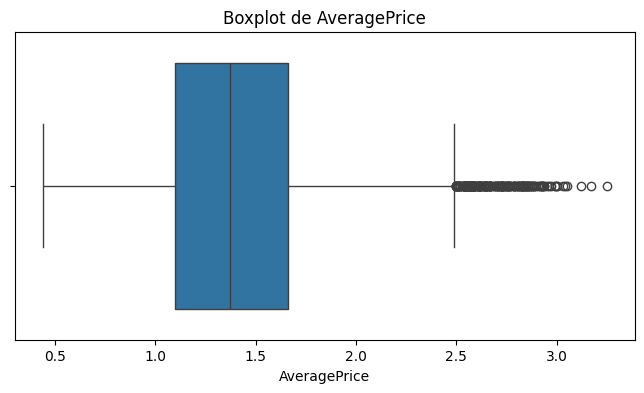

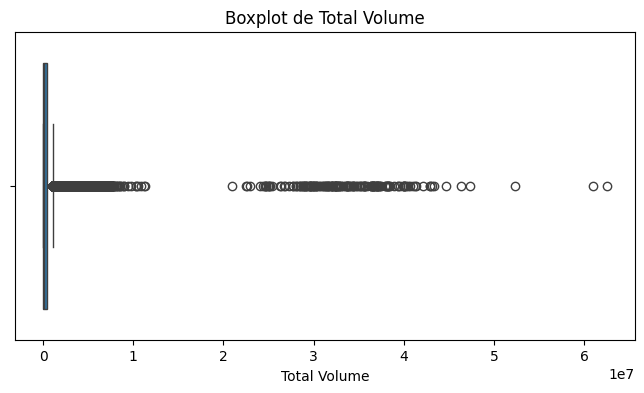

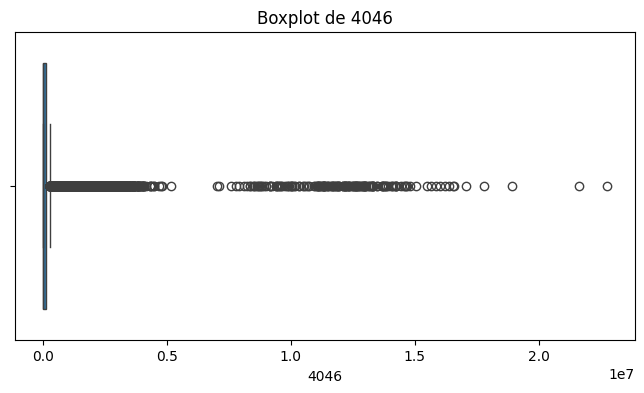

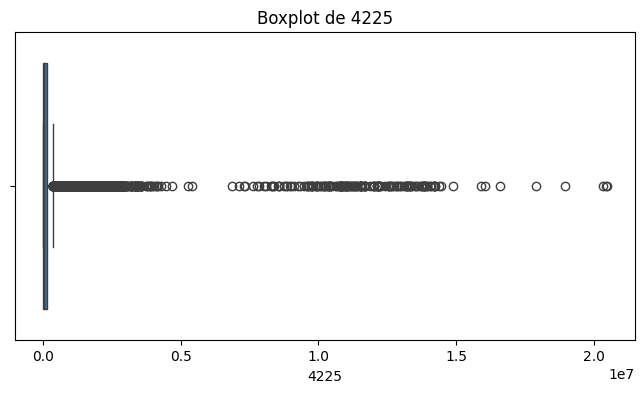

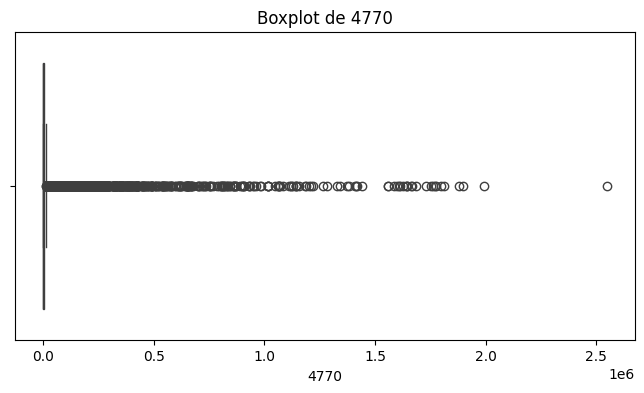

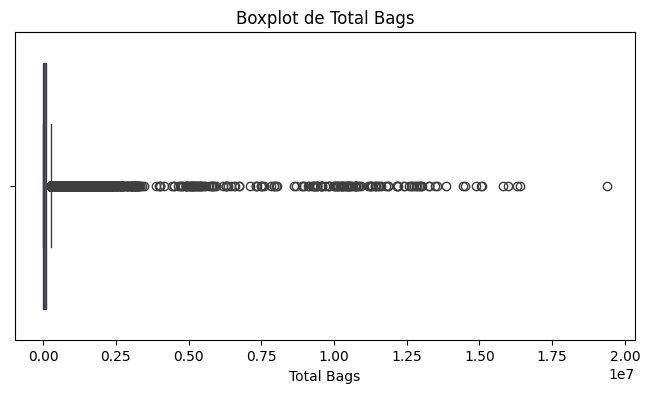

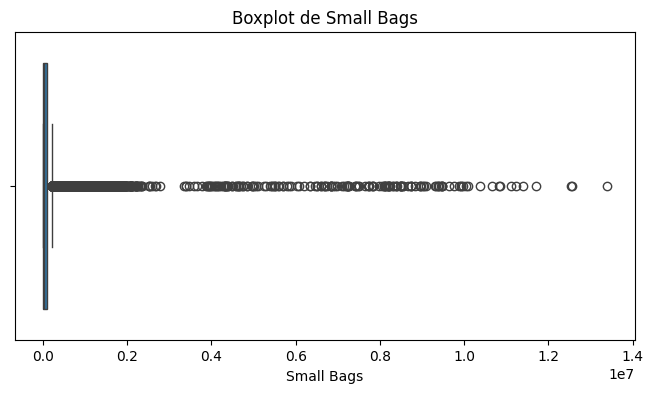

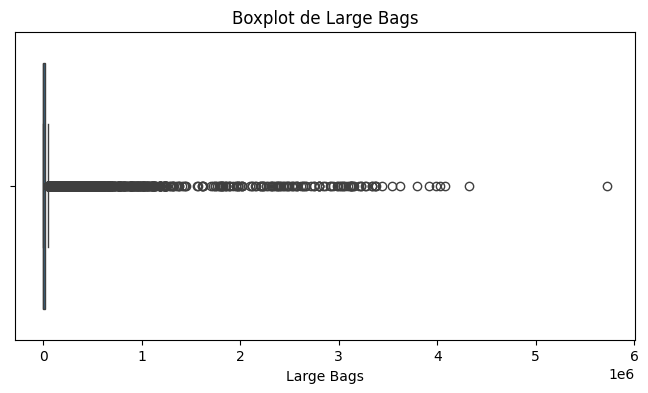

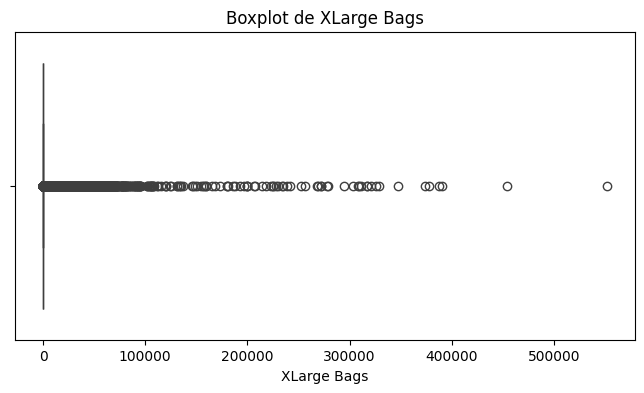

In [ ]:
#busqueda de outliers usando boxplots despues de la limpieza y conversion 
num_cols = ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 
            'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']

for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

In [ ]:
#convertimos a dummies las variables type y region, permite su uso en modelos como K-Means o regresión.
df = pd.get_dummies(df, columns=['type'], drop_first=True)
df = pd.get_dummies(df, columns=['region'], drop_first=True)


In [ ]:
#escalado y normalizacion de datos, K-Means y otros algoritmos basados en distancia se ven afectados
#por la escala de las variables, Estandarizar garantiza que cada variable aporte de forma equitativa 
#al cálculo de distancias.

scaler = StandardScaler()
num_cols = ['AveragePrice', 'Total Volume', '4046', '4225', '4770',
            'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']

df[num_cols] = scaler.fit_transform(df[num_cols])